In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import math

In [2]:
def LineGenerate(lenght, m):
    """
    Creating a line with m random segments
    """
    line = np.zeros(lenght,)
    ab = np.array(sorted(random.sample(range(0, lenght-1), m*2))) # random start and end of the segments
    ab = ab.reshape((m,2)) # start and end of the segments coordinates
    return ab

In [3]:
def MultipleLines(line_lenght, min_seg, max_seg, line_num, max_hight):
    seg_hights = sorted(random.sample(range(0, max_hight), line_num))
    lines = pd.DataFrame(columns = ['Start','End', 'Height', 'Line'])
    for i in range(line_num):
        line =  pd.DataFrame(LineGenerate(line_lenght, random.randrange(min_seg, max_seg)), columns = ['Start','End'])
        line["Height"] = seg_hights[i]
        line["Line"] = i
        lines = pd.concat([lines,line], ignore_index=True)
    return lines

In [4]:
l = 50 # max line lenght 
min_seg = 4 # min segments per line
max_seg = 5 # max segments per line
n = 3 # number of lines
max_hight = 50 # max hight of the higthest segment

In [5]:
base=[50,25]

In [6]:
lines = MultipleLines(l, min_seg, max_seg, n, max_hight)

In [7]:
n_vertices = lines.shape[0]*2
starts = lines['Start'].to_numpy()
ends = lines['End'].to_numpy()
hight = lines['Height'].to_numpy()
x = np.zeros(lines.shape[0]*2)
y =  np.zeros(lines.shape[0]*2)
for i in range(lines.shape[0]):
    x[i*2] = starts[i]
    x[i*2+1] = ends[i]
    y[i*2] = hight[i]
    y[i*2+1] = hight[i]    
edge = np.zeros([lines.shape[0],2])
for i in range(lines.shape[0]):
    edge[i] = [i*2,i*2+1]
g = ig.Graph(n_vertices, edge)

In [8]:
g.vs['x'] = x
g.vs['y'] = y

In [9]:
def AddSegments(g, segments):
    for i in range(segments.shape[0]):
        g.es[g.get_eid(int(segments[i,0]), int(segments[i,1]))]["is_segment"] = True  
        g.vs[int(segments[i,0]), int(segments[i,1])]["group"] = i
    g.es["is_segment"] = [False if is_segment is None else is_segment for is_segment in g.es["is_segment"]]

In [10]:
AddSegments(g, edge)

In [11]:
def PlotTheGraph(g):
    color_dict_vs = {True: "red", False: "black"}
    edge_width = [2 + 10 * int(is_segment) for is_segment in g.es["is_segment"]]
    vertex_color = [color_dict_vs[base] for base in g.vs["base"]]
    fig, ax = plt.subplots(figsize=(50,50))
    ig.plot(
        g,
        target=ax,
        layout='auto',
        vertex_size = 0.5,
        vertex_label = ["           Base"* int(base) for base in g.vs["base"]],
        vertex_label_size = 50,
        vertex_frame_width=4.0,
        vertex_color = vertex_color,
        edge_width = edge_width,
    )
    plt.show()

In [12]:
def AddBase(g, base):
    n=len(g.vs)
    g.add_vertices(1)
    g.vs[n]['x'] = base[1]
    g.vs[n]['y'] = base[0]
    g.vs[n]["base"] = True
    g.vs[0:n]["base"] = False
    g.vs[n]["group"]=g.vs[n-1]["group"]+1

In [13]:
AddBase(g, base)

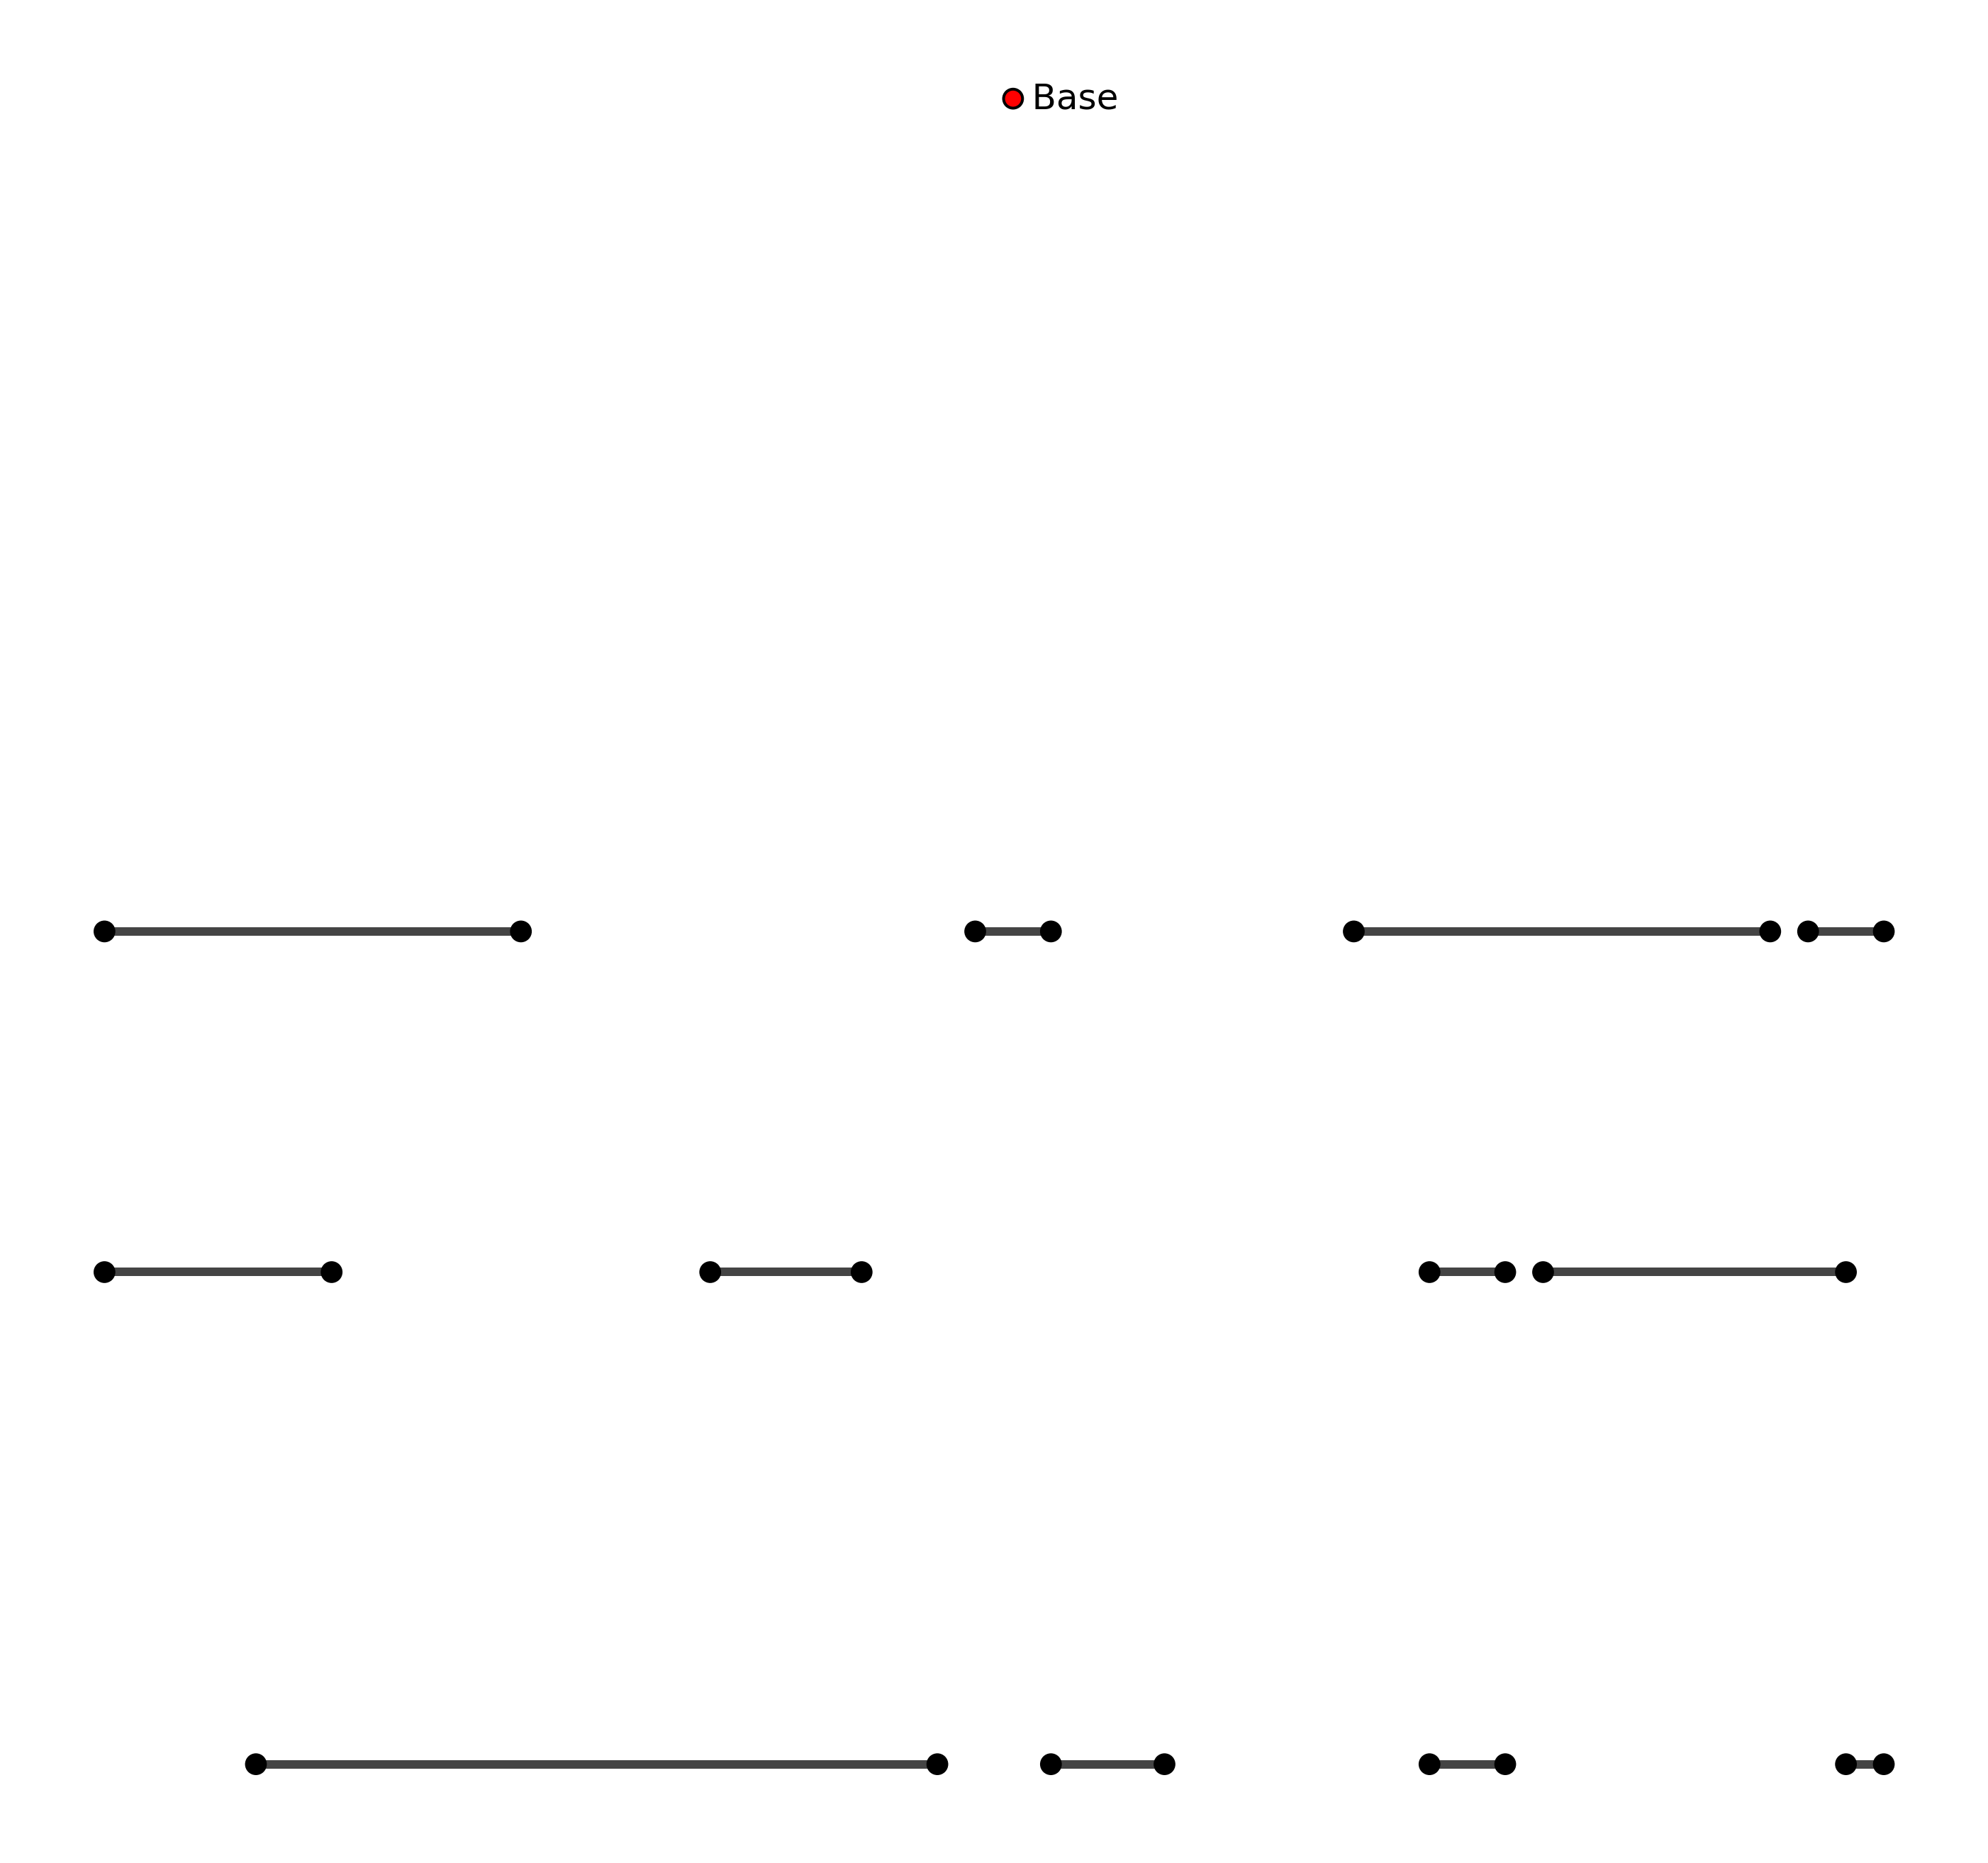

In [14]:
PlotTheGraph(g)

In [15]:
g_group = ig.Graph(n_vertices//2+1)

In [16]:
g.vs[24]["group"]=12

In [17]:
g.vs["group"]

[0,
 0,
 1,
 1,
 2,
 2,
 3,
 3,
 4,
 4,
 5,
 5,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 11,
 12]

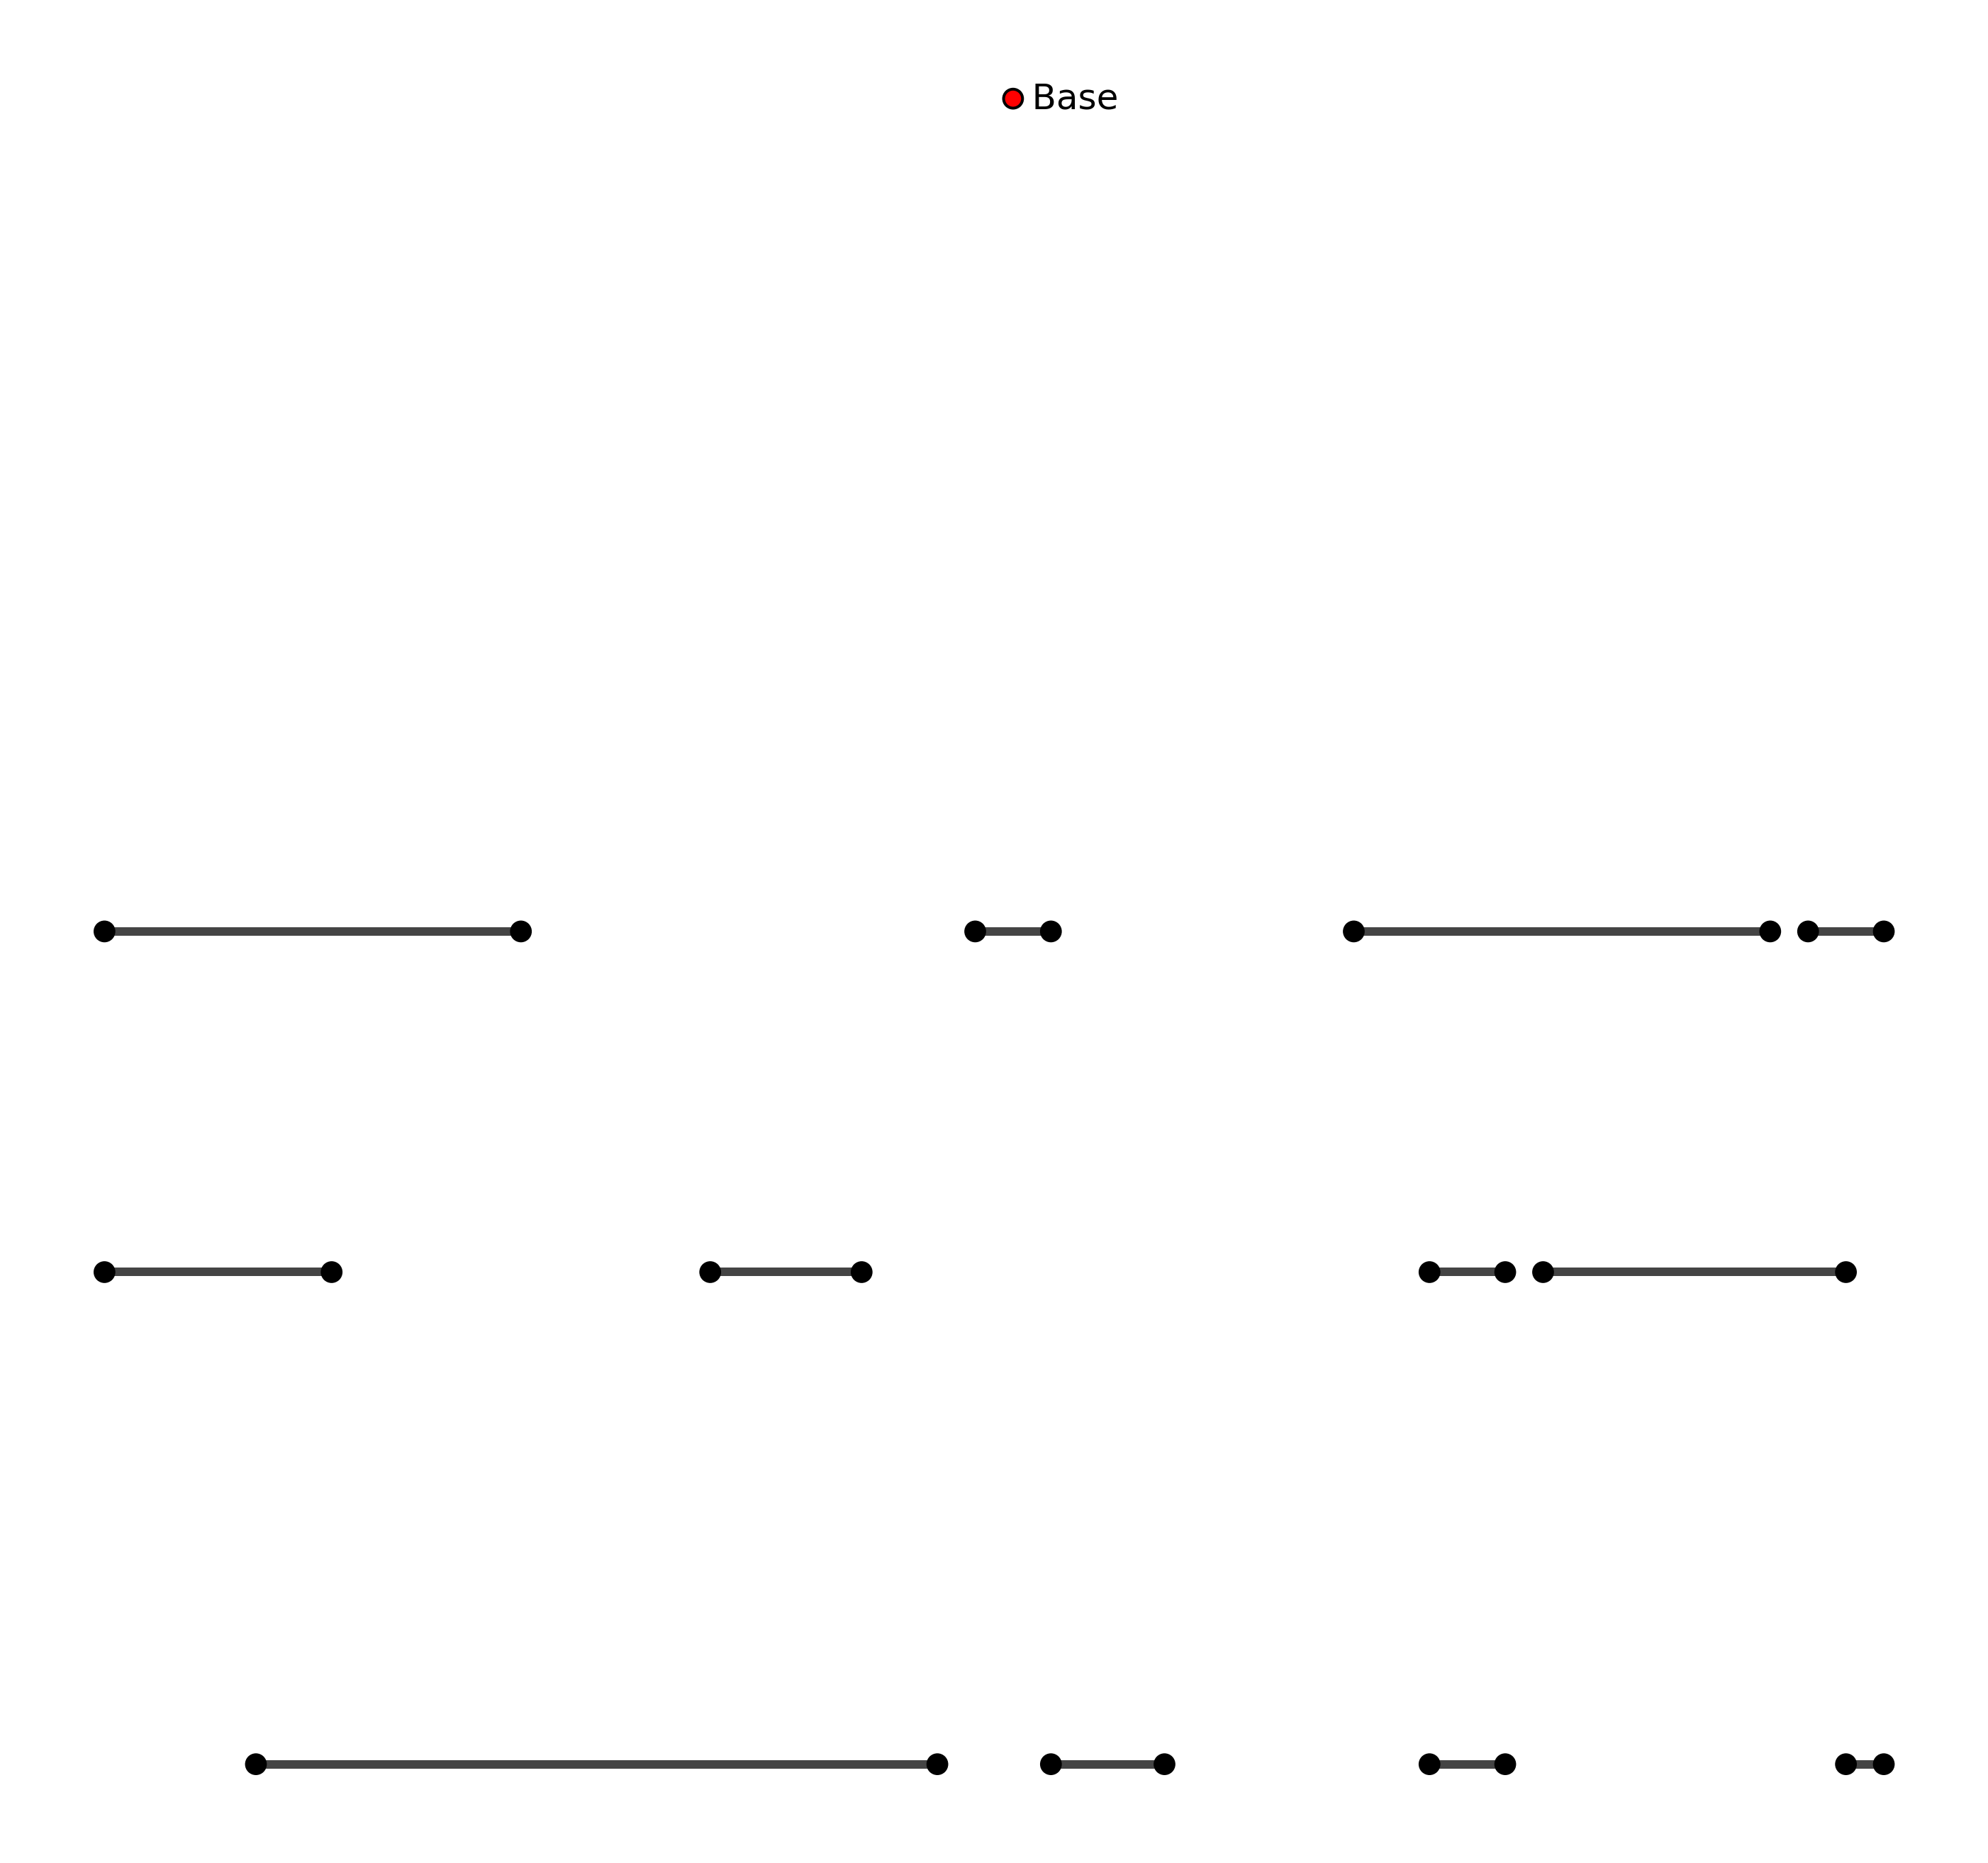

In [18]:
PlotTheGraph(g)

In [19]:
def PlotGroupGraph(g):
#    color_dict_vs = {True: "red", False: "black"}
#    edge_width = [2 + 10 * int(is_segment) for is_segment in g.es["is_segment"]]
#    vertex_color = [color_dict_vs[base] for base in g.vs["base"]]
    fig, ax = plt.subplots(figsize=(10,10))
    ig.plot(
        g,
        target=ax,
        layout='auto',
        vertex_size = 0.3,
        vertex_frame_width=4.0,
#        vertex_color = vertex_color,
#        edge_width = edge_width,
    )
    plt.show()

In [20]:
def chose_a_node(i):
    seg=np.where(np.asarray(g.vs["group"])==i)
    node=seg[0][0]
    if (np.shape(seg)[1]==2):
        if (g.degree(seg[0][0])>g.degree(seg[0][1])):
            node=seg[0][1]
    return node

In [21]:
i=0
arr = []
while i<len(g.vs)-1:
    arr.append(i)
    while (g.vs[i]["y"]==g.vs[i+1]["y"]):
        i+=1
    arr.append(i)
    i+=1

In [22]:
for line in range(0, len(arr)-1):
    for i in range(arr[line]+1,arr[line+1],2):
        g.add_edges([(i,i+1)])
        g.es[g.get_eid(i,i+1)]["is_segment"] = False  

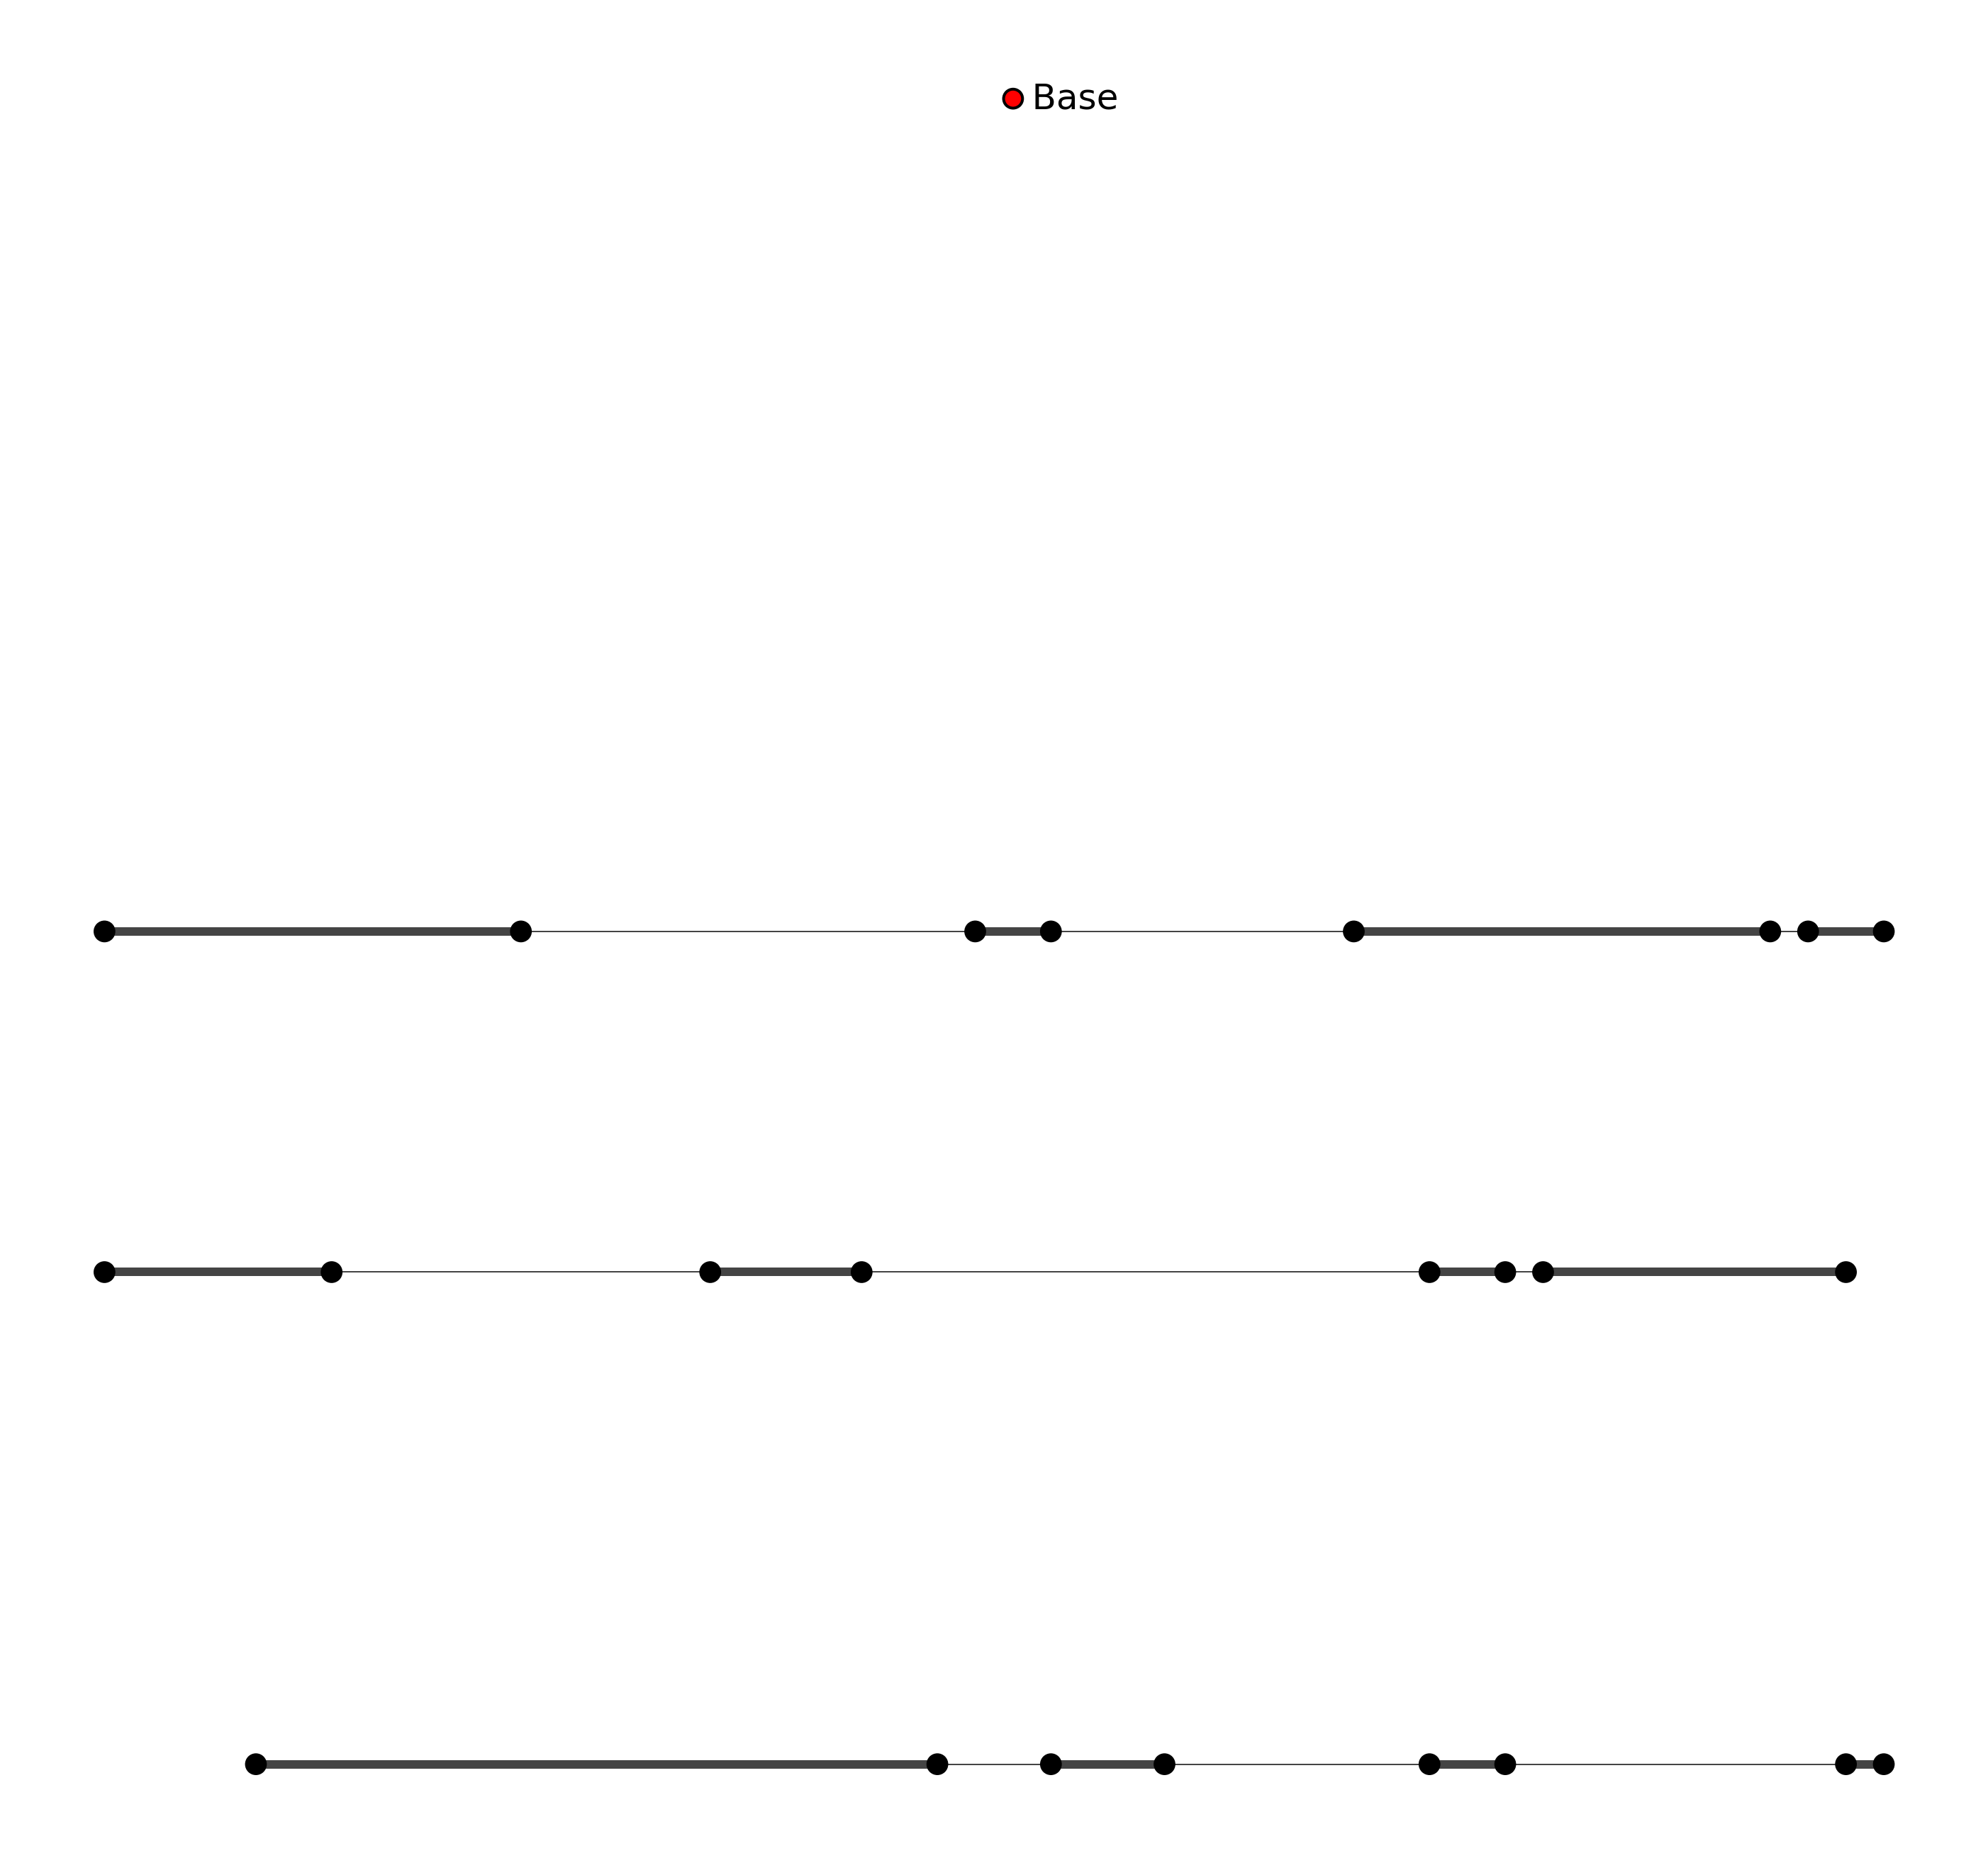

In [23]:
PlotTheGraph(g)

In [24]:
k = np.asarray(g_group.degree())
n=4

while (np.sum(k<n)>1):
    i=np.argmin(k)
    k[i]+=1
    q = chose_a_node(i)
    
    sorted_indexes=np.argsort(k)
    ind=0
    j=sorted_indexes[ind]
    r = chose_a_node(j) 
    while g_group.are_connected(i, j)  or (g.vs[q]["y"]==g.vs[r]["y"]):
        ind+=1
        j=sorted_indexes[ind]
        r = chose_a_node(j) 
        
    k[j]+=1
    if k[j]>n:
        k[j]-=1
        break     
        
    g_group.add_edges([(i,j)])
    print("groups: ",i, j)    
        
    print("connect nodes: ",q, r)
    print("y: ",g.vs[q]["y"], g.vs[r]["y"])
    g.add_edges([(q,r)])
    g.es[g.get_eid(q, r)]["is_segment"] = False  

groups:  0 4
connect nodes:  0 8
y:  6.0 19.0
groups:  1 5
connect nodes:  2 10
y:  6.0 19.0
groups:  2 6
connect nodes:  4 12
y:  6.0 19.0
groups:  3 7
connect nodes:  7 15
y:  6.0 19.0
groups:  8 12
connect nodes:  16 24
y:  28.0 50
groups:  9 0
connect nodes:  18 0
y:  28.0 6.0
groups:  10 1
connect nodes:  20 3
y:  28.0 6.0
groups:  11 2
connect nodes:  23 5
y:  28.0 6.0
groups:  3 4
connect nodes:  6 8
y:  6.0 19.0
groups:  5 8
connect nodes:  11 16
y:  19.0 28.0
groups:  6 9
connect nodes:  13 19
y:  19.0 28.0
groups:  7 10
connect nodes:  14 21
y:  19.0 28.0
groups:  11 12
connect nodes:  22 24
y:  28.0 50
groups:  0 5
connect nodes:  1 10
y:  6.0 19.0
groups:  1 4
connect nodes:  2 9
y:  6.0 19.0
groups:  2 7
connect nodes:  4 15
y:  6.0 19.0
groups:  3 6
connect nodes:  7 12
y:  6.0 19.0
groups:  8 0
connect nodes:  17 0
y:  28.0 6.0
groups:  9 12
connect nodes:  18 24
y:  28.0 50
groups:  10 2
connect nodes:  20 5
y:  28.0 6.0
groups:  11 1
connect nodes:  23 3
y:  28.0 6.0
g

In [25]:
k

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3])

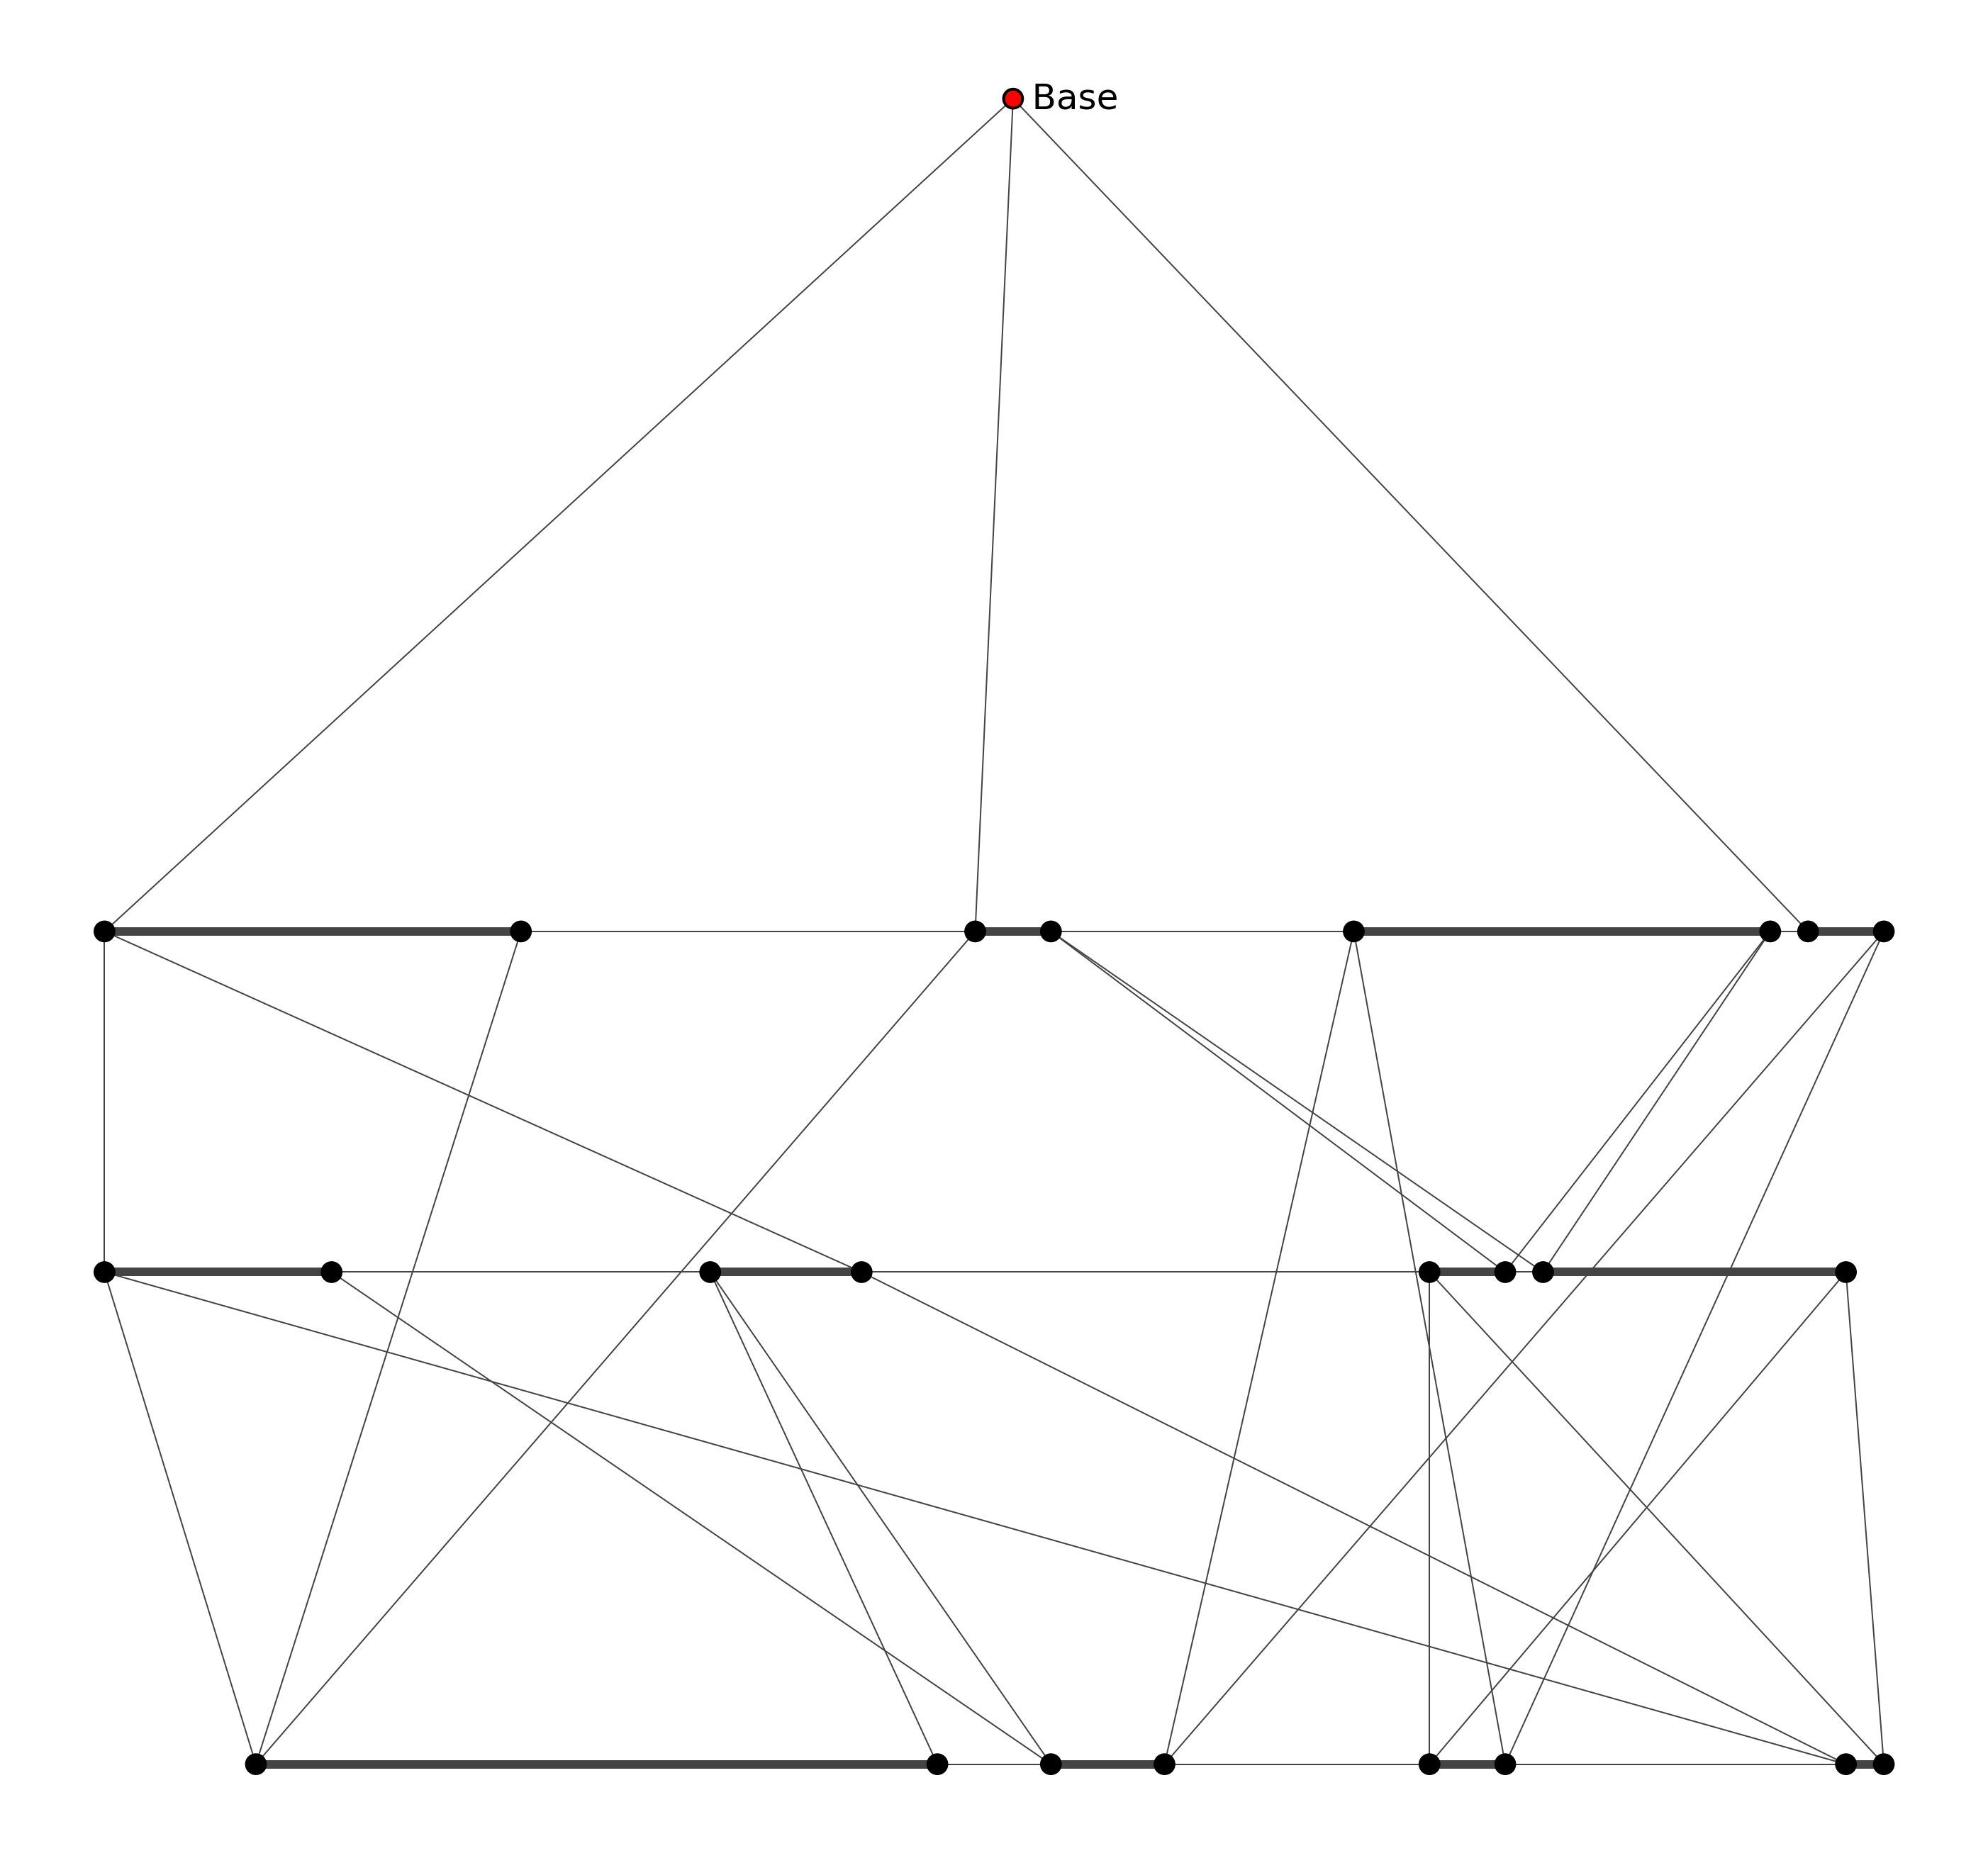

In [26]:
PlotTheGraph(g)

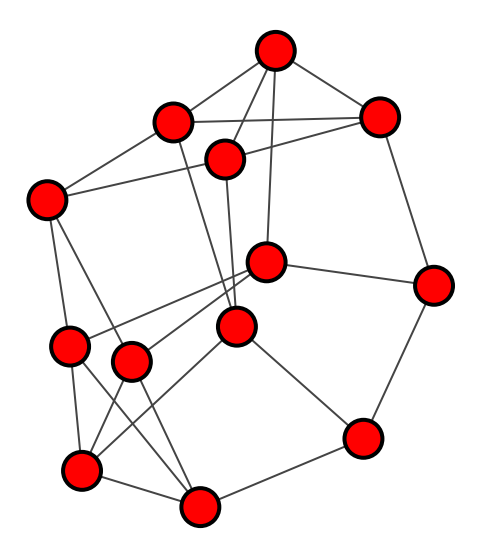

In [27]:
PlotGroupGraph(g_group)